# A Comparison of Public and Private Healthcare Systems

*May 2016* <br /> 
Thomas Webb <br /> 
**N15659338**

## Abstract
This project looks at the similarities and differences between health systems. Specifically those of the **United Kingdom** (which has a universal healthcare model) and the **United States of America** (which retains a largely privatised system). It begins with an introduction on both systems as well as an overview of global healthcare spending as a percentage of GDP before focusing on the two respective systems and their implications on: *cost, staffing and mortality*.

## Background

### Healthcare in the United Kingdom
The United Kingdom relies heavily on its single-payer **NHS** (National Health Service), which is the worlds largest and oldest single-payer healthcare system. Healthcare is entirely free for all UK & EU citizens, nationals from elsewhere are provided with free emergency cover. (NHS, 2016).

While the NHS is a publicly funded entity it also issues contracts to private firms in order to increase cost efficiency and in an attempt to boost competitivity (NHS, 2016). While it is considered one of the UK's proudest accomplishments it is not without flaws, many complain of long waiting times and an occasionally substandard quality of care, a quick google provides plenty of examples: e.g *"NHS problems 'at their worst since 1990s'"* (BBC, 2015a). This can be seen as an explanation as to why there is also a market for private health insurance policies that are purchased by those who believe they can get a 'better' quality of care. But again even those with these policies will often blend between both systems, commencing treatment with an NHS General Practitioner and subsequently making use of whichever system will give them their desired form of care (Pemberton, 2014).

### Healthcare in the United States
The healthcare system of the United States is largely privatised, consumers are expected to pay once they have received almost any form of care, including visits to the Emergency Room. This can be either through an insurance plan or cash. From general doctor visits, to hospitals and ambulances big brands are visible everywhere in healthcare and it is these private companies that provide the majority of care and infrastructure (Lorenzetti, 2015). Many efforts have been made in order to make the system more accesible to those who might otherwise be unable to use it. For example, there are now state funded programmes such as **Medicare** and **Medicaid** for the elderly and those on low income (Medicare.gov, 2016). More recently the *Patient Protection and Affordable Care Act (PPACA)* has introduced stricter controls on insurance companies in order to make the entire system more accessible and affordable (ObamaCare Facts, 2016).

It can be argued that through this privatised system there is an allowance for greater competition which may drive prices down and boosts efficiency. It allows patients a greater choice when choosing both their healthcare providers and insurers. There is also the argument that it creates a freer system able to experiment with new treatments and unhampered by restrictive governmental budgets and interventions.

## Global Public Versus Private Healthcare Spending

Through `Pandas` and `Matplotlib` the data below was sourced from the **World Bank** in order to create three graphs to demonstrate public and private healthcare spending, both over time and as an average across time. These figures focus specifically on spending as a percentage of GDP in **Argentina, Australia, Canada, Germany, the UK & the US**. 'Western' countries were chosen specifically to provide a fair comparison.

In [1]:
#Import pandas & matplotlib Tools
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import wb
import matplotlib as mpl
import matplotlib.pyplot as plt 

#Download necessary data from World Bank
#Private health spending as a percentage of GDP
df1 = wb.download(indicator='SH.XPD.PUBL.ZS', country = ['GB', 'USA', 'CAN', 'DEU', 'AUS', 'ARG'], start=1990, end=2016)
#Public health spending as a percentage of gdp
df2 = wb.download(indicator='SH.XPD.PRIV.ZS', country = ['GB', 'USA', 'CAN', 'DEU', 'AUS', 'ARG'], start=1990, end=2016)

#Combine two dataframes together
df3 = pd.concat([df1,df2], axis = 1)
#Rename column and index names
df3.columns = ['Public Spending', 'Private Spending']
df3.index.names = ['Country', 'Year']

#Drop any NA values
df3 = df3.dropna(0)

### Public and Private Spending Over Time

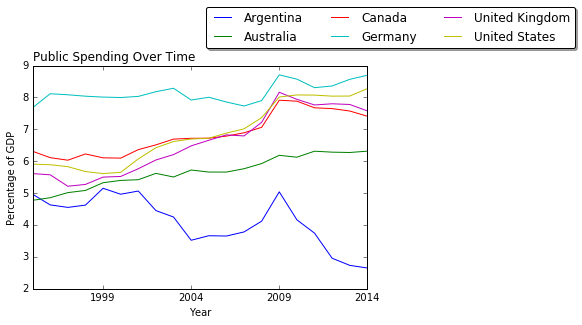

In [2]:
#Public spending over time
#Create fig and ax objects
fig, ax = plt.subplots()
#Loop through the six countries and plot them
for x in ['Argentina', 'Australia', 'Canada', 'Germany', 'United Kingdom', 'United States']:
    df3.xs(x)['Public Spending'].plot(ax = ax)
#Set the title    
ax.set_title('Public Spending Over Time', loc='left')
ax.set_ylabel('Percentage of GDP')
#Invert the X-axis, because it's flipped
plt.gca().invert_xaxis()
#Set and move legend
l1 = ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
#Counter variable for setting names in legend
count = 0
#Loop for going through legend and setting names
for x in ['Argentina', 'Australia', 'Canada', 'Germany', 'United Kingdom', 'United States']:
    l1.get_texts()[count].set_text(x)
    #Increment counter
    count += 1

We can see overall that for the majority of countries there has been a generally positive trend in public spending over time. There also seems to be a peak for many of them during 2009, potentially due to the end of the **global economic recession**. Argentinian public funding however seems to be faltering.

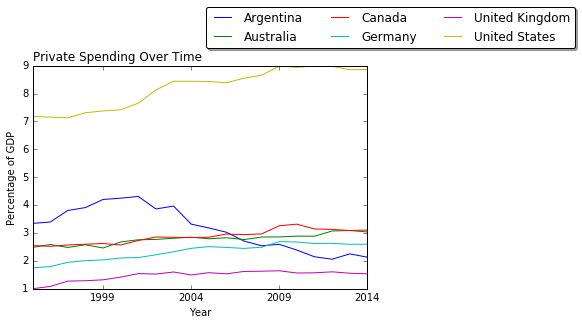

In [3]:
#Private spending over time
#Create fig and ax objects
fig, ax = plt.subplots()
#Loop through the six countries and plot them
for x in ['Argentina', 'Australia', 'Canada', 'Germany', 'United Kingdom', 'United States']:
    df3.xs(x)['Private Spending'].plot(ax = ax)
#Set the title  
ax.set_title('Private Spending Over Time', loc='left')
ax.set_ylabel('Percentage of GDP')
#Invert the X-axis, because it's flipped
plt.gca().invert_xaxis()
#Set and move legend
l2 = ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
#Counter variable for setting names in legend
count = 0
#Loop for going through legend and setting names
for x in ['Argentina', 'Australia', 'Canada', 'Germany', 'United Kingdom', 'United States']:
    l2.get_texts()[count].set_text(x)
    #Increment counter
    count += 1

On the other hand private spending as a percentage of GDP has relatively constant over the past ten years apart from in Argentina, where it seems that both public and private spending are on the downturn. While there has been some gradual increase in the UK private funding, Canada, Germany and Australia have had fairly constant levels over the past 25 years. The USA on the other hand has experienced a fairly large increase in the same period. Showing that both systems have been spending more and more on healthcare irrespective of structure. 

### Mean Public Spending (1990-2014)

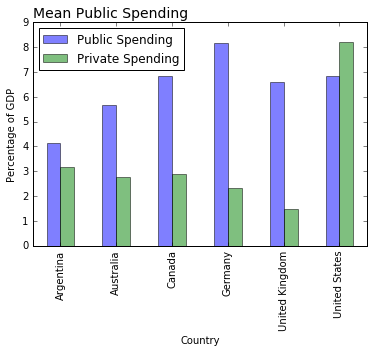

In [4]:
#Group by mean
mean_plot = df3.groupby(level=0).mean()

#Create fig and ax objects
fig, ax = plt.subplots()

#Plot and set titles
mean_plot.plot(ax=ax, kind='bar', alpha=0.5)
ax.set_title('Mean Public Spending', loc='left', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of GDP')

In terms of a summary mean, We can see that the private spending in the USA far outranks that in any of the other countries. It does however also have the second highest percentage of GDP spent on public funding out of the others, behind Germany. The Commonwealth Fund (2015) cites a study that this is due to both the higher cost of medication and a much greater (potentially over) use of advanced medical technology in the US. The UK has relatively high public funding, but compared to the others very low private spending. 

## Implications Of The System's Costs on Treatment, Staffing & Mortality

Turning solely to the UK and the USA, this section looks to examine the difference(s) *if any* in quality of care between the two systems. Namely the effect of system costs on the patients, the ability to staff said systems and mortality rates. 

### Effect of Costs on Continuation of Treatment

When it comes to analysing the quality of care, the ability of a patient to acutally take part in that care and continue with it is essential. This is where the cost of each system to each personal user comes in to play. In a single-payer system patients are reassured knowing that all their care is taken care of through tax contribution (aside from a potential £8 copay for prescriptions (NHS, 2016)). Whereas a system that albeit may be potentially more lean and efficient such as that of the United States can prevent those without sufficient funds from receiving or discontinuing the treatment they recquire.

The following data comes from the **OECD**, unfortunatly the data set is too large for `pandas_datareader` to read process and so a `.csv` file of the required variables was downloaded from: http://stats.oecd.org/. The data set for costs unfortunately only had information for 2013. Aside from renaming the file all manipulation is done below:

In [5]:
#Read in file
costsdf = pd.read_csv('/Users/ThomasWebb/Documents/University/Third Year/Second Semester/Data Bootcamp/OECD_COSTS.csv')
#Remove extra columns, that aren't needed or blank
costsdf.drop(['COU', 'PER', 'Periods', 'IND', 'GEN', 'AGE', 
              'Age Group', 'VAL', 'Gender', 'Value', 'Flags', 'Flag Codes'],inplace=True,axis=1)
#Rename columns
costsdf.columns = ['Country', 'Description', 'Rate Per 100 Patients']
#Set index to country
costsdf = costsdf.set_index(['Country'])

costsdf[''] = ''
costsdf.set_index('', append=True, inplace=True)

#Split the Table for Easy Viewing
UK_Costs = costsdf.head(4)
US_Costs = costsdf.tail(4)

#resize output display
pd.set_option('display.max_colwidth', 400)

In [6]:
UK_Costs

Description  \
Country                                                                                              
United Kingdom                                                   Consultation skipped due to costs   
                                        Medical tests, treatment or follow-up skipped due to costs   
                                                         Prescribed medicines skipped due to costs   
                 Waiting time of more than four weeks for getting an appointment with a specialist   

                 Rate Per 100 Patients  
Country                                 
United Kingdom                     2.2  
                                   2.5  
                                   2.1  
                                  18.3

In [7]:
US_Costs

Description  \
Country                                                                                             
United States                                                   Consultation skipped due to costs   
                                       Medical tests, treatment or follow-up skipped due to costs   
                                                        Prescribed medicines skipped due to costs   
                Waiting time of more than four weeks for getting an appointment with a specialist   

                Rate Per 100 Patients  
Country                                
United States                    27.7  
                                 21.3  
                                 21.1  
                                 25.3

These two tables show fairly predictable data, in a state-funded system is there is a much lower skipping of treatments, be it consultations, tests, or taking of prescripted medication. However in terms of waiting times for a consultantcy appointment, they are actually higher in the United States than the UK, this could be due to a number of factors such as a higher demand due to a larger population. However, it is surprising considering the high number of complaints about the NHS. It would be interesting to see how this data has changed in years following 2013, I'd imagine that the US figures relating to treatment skipped would be gradually declining due to *Obamacare* and further policies aimed at making insurance and care more affordable.

### Staffing

Apart from its effects on a patient's ability to pay for their treatment, the amount of wealth each system creates will affect its ability to remunerate staff. This may or may not result in a greater number of nurses, doctors, support staff etc. An assumption here is that a privatised system designed to create profit will be more attractive to work for and will result in higher staffing and by extension better patient care (i.e. more doctors and nurses will result in better treatment).

The following data was downloaded again from OECD Stats, again it was too large to read using `datareader`. As above, all manipulation is done in the notebook apart from renaming the file. The dataset is locatable under health > Total health and social employment.

In [8]:
#read in file
address = '/Users/ThomasWebb/Documents/University/Third Year/Second Semester/Data Bootcamp/OECD_Employment.csv'
employmentdf = pd.read_csv(address)
#drop columns
employmentdf.drop(["Variable", "UNIT", "COU", "Flag Codes", "Flags", "YEA", '﻿"VAR"'], inplace = True, axis = 1)
#set index
employmentdf.set_index(["Country", "Year"])
#remove the rows for 2014 for USA as N/A in UK
employmentdf = employmentdf.drop(employmentdf.index[[104, 34]])
#same for uk years prior to 2003 as missing in USA
employmentdf = employmentdf.drop(employmentdf.index[0:12])
employmentdf = employmentdf.drop(employmentdf.index[22:34])
employmentdf = employmentdf.drop(employmentdf.index[45:57])

### Mean Table

In [9]:
#create mean table
employment_mean = employmentdf.groupby(["Country", "Measure"]).mean()
employment_mean.drop("Year", inplace = True, axis = 1)
employment_mean.columns = ["Mean (2003-2013)"]
employment_mean.round(2)

Mean (2003-2013)
Country        Measure                                                     
United Kingdom % of total civilian employment                         12.57
               Density per 1 000 population (head counts)             58.49
               Number of persons (head counts)                   3619600.00
United States  % of total civilian employment                         12.75
               Density per 1 000 population (head counts)             59.66
               Number of persons (head counts)                  18081454.55

### TimeSeries Plot

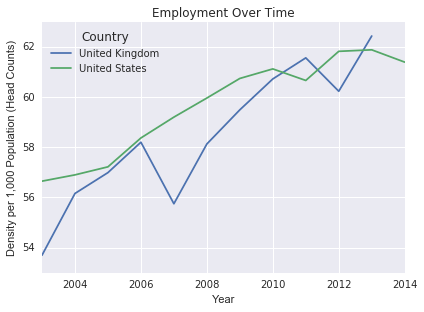

In [10]:
#create a dataframe with just density per 1,000 population
densitydf = employmentdf[employmentdf['Measure'] == 'Density per 1 000 population (head counts)']
#import seaborn
import seaborn as sns
#plot the time series
sns.set()
fig, ax = plt.subplots(figsize = (6.5,4.5))
sns.tsplot(data=densitydf, time="Year", unit="Measure", condition="Country", value="Value", ax = ax)
ax.set_ylabel('Density per 1,000 Population (Head Counts)')
ax.set_title('Employment Over Time')

The table and graph show that overall there is not a large difference over time in employment between the two systems per capita. However, this might be slightly different in more recent years as the data set only reaches as far forward as 2013. We can see US employment dipping around 2014. What is interesting to note is that the number of healthcare professionals employed dropped solely, and largely, in the UK (around 2007) which might be a side effect of the **global recession**. This might suggest that the publicly funded NHS model is more affected by the economy than a private firm. News articles from that time suggest that it was hit hard: http://www.telegraph.co.uk/news/health/news/5485814/NHS-will-face-15bn-budget-shortfall-due-to-effects-of-recession-managers-warn.html

What surprises me about this data is that I expected employment to be much higher in the US due to the ability of a private industry to attract staff through higher wages (which at a glance are on average $20,000 higher according to the OECD figures on their site), however it may be possible that around 13% of total civilian employment is an optimal number for healthcare systems. 

### Mortality

The most crucial factor to examine between two countries and their healthcare systems is their respective mortality rates. The whole purpose of a hospital is to heal (or somewhat crudely, to try and stop us dying). There are arguments for both systems being superior in this regard, a privatised system is often less restricted with treatment options unlike a single-payer scheme where treatment is often decided at a regional/national level and gaining approval for new or experimental treatment is difficult. Whereas a publicly funded operation is more readily available and a lack of treatment costs incentivises people to seek treatment which can then in turn drop mortality rates.

The below data is taken again from the OECD. Variables were selected and then the file was downloaded as a `.CSV` and read into pandas. I decided to focus on four types: **total deaths, circulatory related, respiratory related and lukemia**.

In [11]:
#read in data
mortality = pd.read_csv('OECD_MORTALITY.csv')
#drop extra columns
mortality.drop(['﻿"VAR"', "UNIT", "COU", "YEA", "Flag Codes", "Flags"], inplace=True, axis=1)

#create datasets for total, circulatory, respiratory & lukemia deaths
totaldeaths = mortality[mortality['Variable'] == 'All causes of death']
circulatory_deaths = mortality[mortality['Variable'] == 'Diseases of the circulatory system']
respiratory_deaths = mortality[mortality['Variable'] == 'Diseases of the respiratory system']
leukemia_deaths = mortality[mortality['Variable'] == '-- Leukemia']

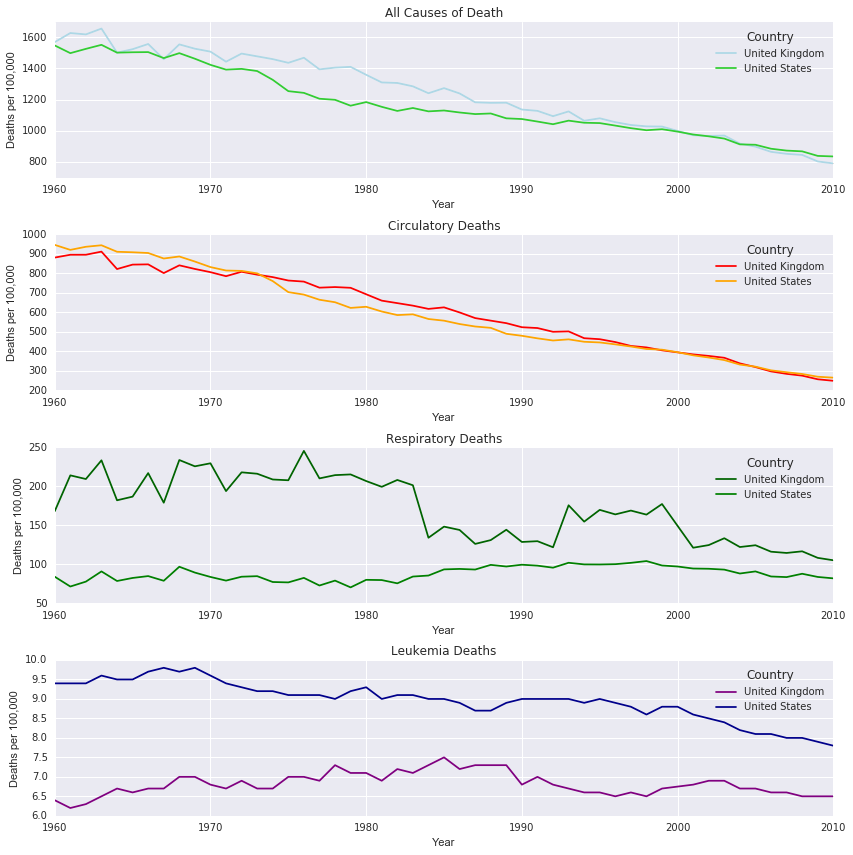

In [12]:
#plot them all on three sub plots, with seaborn
fig, ax = plt.subplots(4, figsize=(12, 12))

#plot settings:
sns.tsplot(data=totaldeaths, time="Year", unit="Measure", condition="Country", value="Value", ax = ax[0], 
          color = ['lightblue', 'limegreen'])
sns.tsplot(data=circulatory_deaths, time="Year", unit="Measure", condition="Country", value="Value", ax=ax[1],
           color = ['red','orange'])
sns.tsplot(data=respiratory_deaths, time="Year", unit="Measure", condition="Country", value="Value", ax=ax[2],
          color = ['darkgreen','green'])
sns.tsplot(data=leukemia_deaths, time="Year", unit="Measure", condition="Country", value="Value", ax=ax[3],
          color = ['purple', 'darkblue'])
#titles
ax[0].set_title("All Causes of Death"), ax[1].set_title("Circulatory Deaths"), ax[2].set_title("Respiratory Deaths"), 
ax[3].set_title("Leukemia Deaths")
ax[0].set_ylabel('Deaths per 100,000'),ax[1].set_ylabel('Deaths per 100,000'),ax[2].set_ylabel('Deaths per 100,000'),
ax[3].set_ylabel('Deaths per 100,000')
fig.tight_layout()

The above graphs show how in terms of *Total Deaths* over time both countries have had reducing overall mortality. Which would be expected as medical technology and treatments are shared around the world. Interestingly a very similar trend is seen for *Circulatory Deaths* as well, suggesting treatment has really improved in the last 50 years.

However both countries have very different mortality rates for Leukemia and Respiratory deaths. The UK has a much lower rate of leukemia deaths, compared to the US which conversely has a lower rate of respiratory deaths.

There are many extra variables that would need to be taken into account here to draw any conclusions, but what it does show is that in terms of the ultimate metric for a health care system you cannot say that one is simply better than the other. In fact if lifestyle factors were taken into account between the two countries you would likely see a narrowing of the gaps between the lines on these graphs.

## Conclusion

Both systems are well entrenched in their respective countries. The purpose of this project wasn't to specifically recommend one over the other, they both have their pro's and con's.

What the above analysis does show however is that when it comes to continuation of care and its affordability, there is no question it is better to have a state-funded system. It allows cheaper medical costs and in turn creates the scenario you see above in public global spending per GDP where publicly funded systems end up spending less than the USA. The example of *Martin Shkreli*'s hike of the price of Daraprim comes to mind as a scenario that is simply not seen in other countries (BBC, 2015b). Publicly funded systems also seem to have no problem in attracting staff, despite lower wages. However the United States seems to fair slightly better in terms of overall mortality as well as patient choice. As the cost of care becomes more affordable to the general public it might even start to outperform services such as the NHS in the other metrics such as patient continuation, but this remains something to be seen, and certainly only in the far future.

## Bibliography
### Data Sources

• **OECD** - http://stats.oecd.org/Index.aspx?DatasetCode=HEALTH_STAT *(Accessed 5.2.15)* <br /> 
-- (Quality Indicators) http://stats.oecd.org/Index.aspx?DatasetCode=HEALTH_HCQI *(Accessed 5.2.15)*<br /> 
-- (Mortality) - http://stats.oecd.org/restsdmx/sdmx.ashx/GetDataStructure/HEALTH_STAT *(Accessed 5.2.15)*<br />
• **World Bank** - http://data.worldbank.org/ *(Accessed 5.2.15)*

### Citations

• **BBC (2015a)** NHS problems 'at their worst since 1990s' [online] Available at: http://www.bbc.com/news/health-32057948 [Accessed 12 Apr. 2015]. <br />
• **BBC (2015b)** Who is Martin Shkreli - 'the most hated man in America'? [online] Available at: http://www.bbc.com/news/world-us-canada-34331761 [Accessed 30 Apr. 2015]. <br />
• **Commonwealth Fund, The (2015)** US Spends More on Health Care Than Other High-Income Nations But Has Lower Life Expectancy, Worse Health [online] Available at: http://www.commonwealthfund.org/publications/press-releases/2015/oct/us-spends-more-on-health-care-than-other-nations [Accessed 23 Apr. 2015] <br />
• **Lorenzetti (2015)** The Fortune 500's 10 biggest health-care companies, Fortune.com [online] Available at: http://fortune.com/2015/06/20/fortune-500-biggest-healthcare-companies/ [Accessed 12 Apr. 2015].  <br /> 
• **Medicare.gov (2016) ** Medicare.gov: the official U.S. government site for Medicare [online] Available at: https://www.medicare.gov [Accessed 14 Apr. 2015]. <br />
• **NHS (2016)** The NHS history [online] Available at: http://www.nhs.uk/NHSEngland/thenhs/nhshistory/Pages/the-nhs%20history.aspx [Accessed 11 Apr. 2016]. <br />
• **ObamaCare Facts (2015) ** Affordable Care Act Summary [online] Available at: http://obamacarefacts.com [Accessed 14 Apr. 2015].<br />
• **Pemberton (2014)** 'Superior' private health is a myth, The Telegraph [online] Available at: http://www.telegraph.co.uk/news/nhs/11053982/Superior-private-health-is-a-myth.html [Accessed 12 Apr. 2015]. <br />